In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 👉🏻 Task 2

In [164]:
df = pd.read_csv('D2.csv')
print(df.info())
# print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB
None


## Task 1-1
What pre-processing was required on the dataset (D2.csv) before building the clustering model and why? 

Answer: 
1. Correcting data type, because wrong data types might lead to inaccuract results.
1. Correcting missing and noisy data, because this could mislead the model during the training, resulting in a bad quality model. 
1. Depending on the algorithm we are going to apply to the data, we might need to convert categorical data to numerical data. In our case, in order to retrieve more imformation from the data, we can consider to convert age, gender, insurance, working, or income into numerical data
 

## Task 1-2
Build a clustering model to profile the characteristics of COVID positive individuals based on the variables containing **numerical** data. Answer the followings: 

Firstly, pikc some nurmerical variables.  

In [196]:
# df1 = df[df['covid19_positive'] == 1]
# df2 = df1[['contacts_count', 'worried']]
# or
df2 = df[['contacts_count', 'worried', 'covid19_positive']]

standardisation/normalisation

In [161]:

def decimal_scaling(data):
    max_value = data.max()
    num_digits = len(str(max_value)) - 1 
    return data / (10 ** num_digits)

from sklearn import preprocessing
def min_max(data):
    x_vals = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x_vals)
    ret = pd.DataFrame(x_scaled)
    return ret

# print(df2['contacts_count'])
# df2 = min_max(df2)

df2['contacts_count'] = decimal_scaling(df2['contacts_count'])
df2['worried'] = decimal_scaling(df2['worried'])

# df2['contacts_count']

Apply scaling

In [197]:
from sklearn.preprocessing import StandardScaler

# convert numerical_data to matrix
def scaling(df, ):
    X = df.to_numpy()

    # scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [198]:
X = scaling(df2)
# X

#### 🧑🏼‍🔬 experiment: medium

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def k_medians(X, k, max_iter=300):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iter):
        labels = np.argmin(pairwise_distances(X, centroids), axis=1)
        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    inertia = 0
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            inertia += np.sum(pairwise_distances(cluster_points)) / len(cluster_points)
    return centroids, labels, inertia




# model = k_medians(X, 3)

# # sum of intra-cluster distances
# print("Sum of intra-cluster distance:", model[2])
# print("Centroid locations:")
# for centroid in model[0]:
#     print(centroid)


#### - end

adopt k-means algorithm

In [199]:
# random state, we will use 42 instead of 10 for a change
rs = 30678

In [200]:
from sklearn.cluster import KMeans

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)


Sum of intra-cluster distance: 9225.426123511617
Centroid locations:
[-0.16998875 -1.27892787 -0.6920634 ]
[-0.53046762  0.51890456  0.14689785]
[1.64572095 0.02878821 0.38232643]


Try to find optimal number cluster ('K') by elbow method and Silhouette score

In [201]:
# this whole process should take a while
def generate_multi_clusters_with_diff_ks(X, rs, start=2, to=20):
    clusters = []
    inertia_vals = []
    for k in range(start, to, 2):
        # train clustering with the specified K
        model = KMeans(n_clusters=k, random_state=rs)
        model.fit(X)
        # model = k_medians(X, 3)
        
        # append model to cluster list
        clusters.append(model)
        inertia_vals.append(model.inertia_)
    return clusters, inertia_vals
    # inertia_vals.append(model[2])
    

In [202]:
clusters, inertia_vals = generate_multi_clusters_with_diff_ks(X, rs)

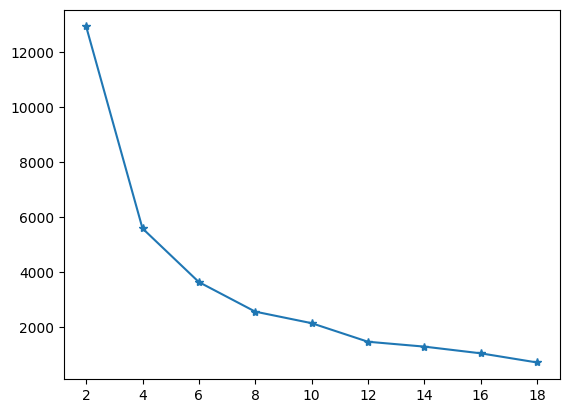

In [203]:
# plot the inertia vs K values
plt.plot(range(2,20,2), inertia_vals, marker='*')
plt.show()

In [204]:
from sklearn.metrics import silhouette_score
print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))
# print("Silhouette score for k=6", silhouette_score(X, clusters[6][1]))
print(clusters[4])
print("Silhouette score for k=10", silhouette_score(X, clusters[4].predict(X)))
# print("Silhouette score for k=8", silhouette_score(X, clusters[3][1]))

KMeans(random_state=30678)
Silhouette score for k=8 0.5823005859133616
KMeans(n_clusters=10, random_state=30678)
Silhouette score for k=10 0.5883100630607685


###  1-2-a.	
What clustering algorithm have you used and why? 

### 1-2-b.
List the attributes used in this analysis

### 1-2-

## 1-3

In [206]:
model = clusters[4]

Cluster membership
Cluster_ID
1    1180
6    1084
2     970
4     583
3     472
8     451
5     439
0     282
7     249
9      79
Name: count, dtype: int64


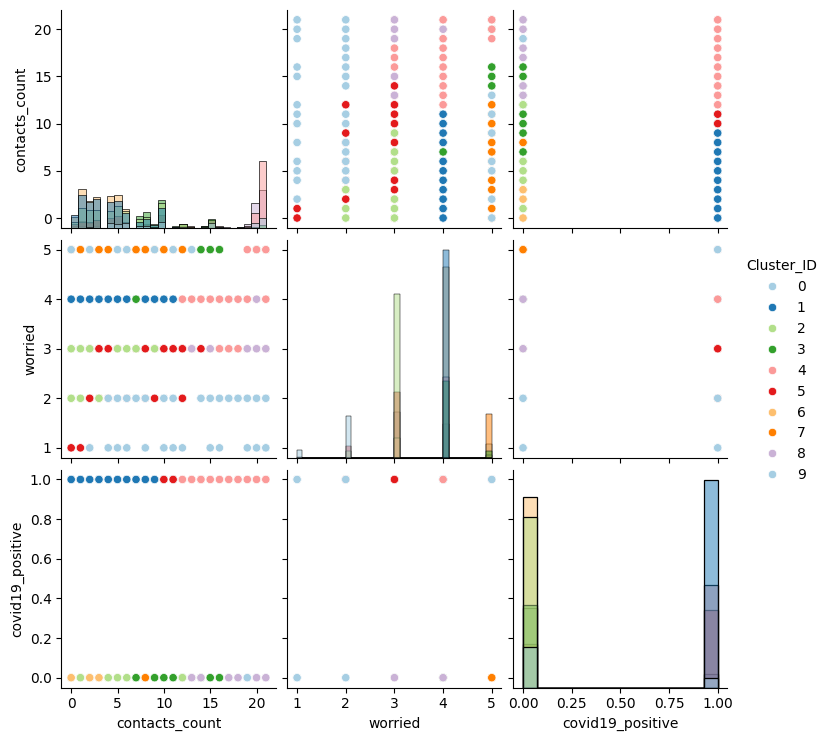

In [216]:

# again, ignore the warning
y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

custom_palette = sns.color_palette("Paired", 9)
# pairplot
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind="hist", palette=custom_palette)

# cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind="kde", palette=custom_palette)
# cluster_g.map_lower(sns.kdeplot, levels=4, color=".2")
# sns.color_palette("bright")
plt.show()

Distribution for cluster 0


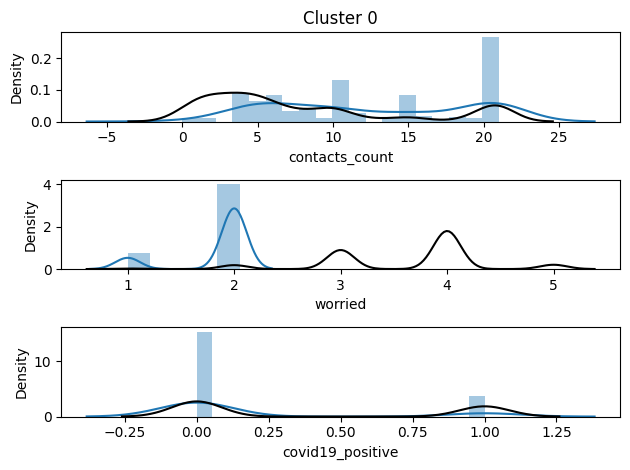

Distribution for cluster 1


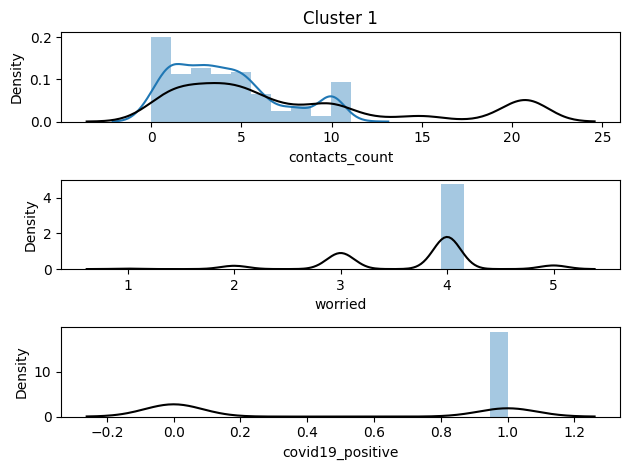

Distribution for cluster 2


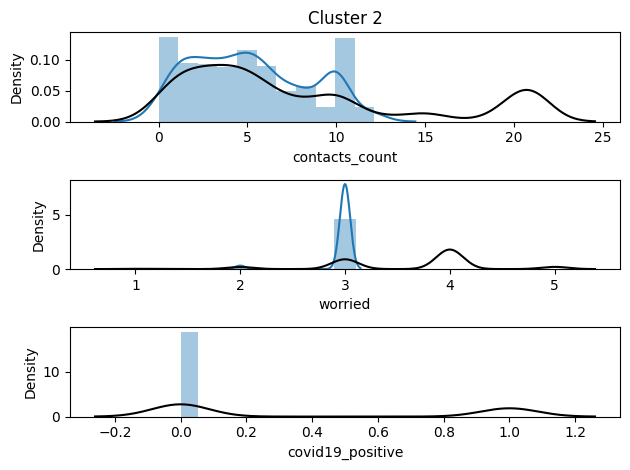

Distribution for cluster 3


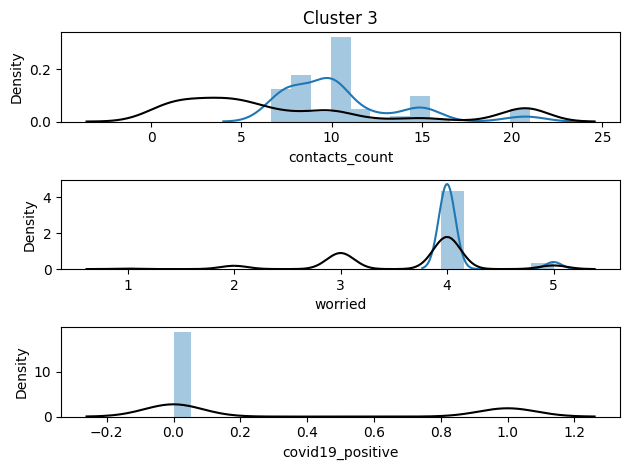

Distribution for cluster 4


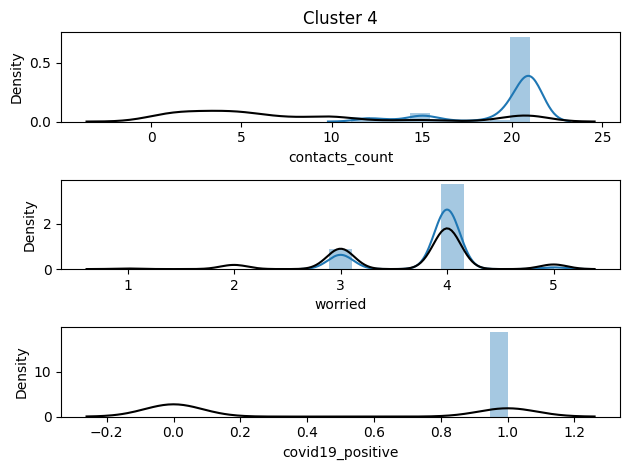

Distribution for cluster 5


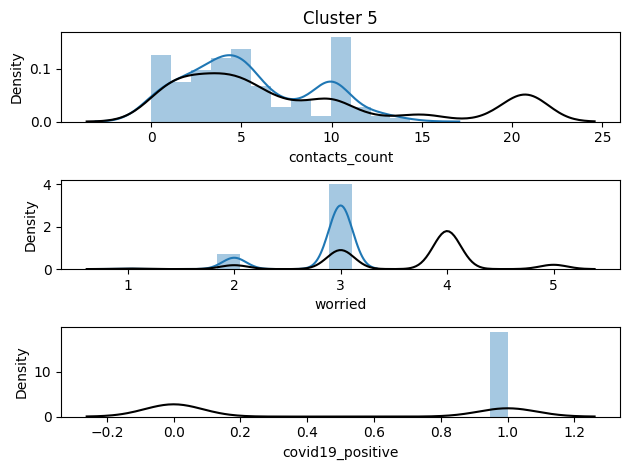

Distribution for cluster 6


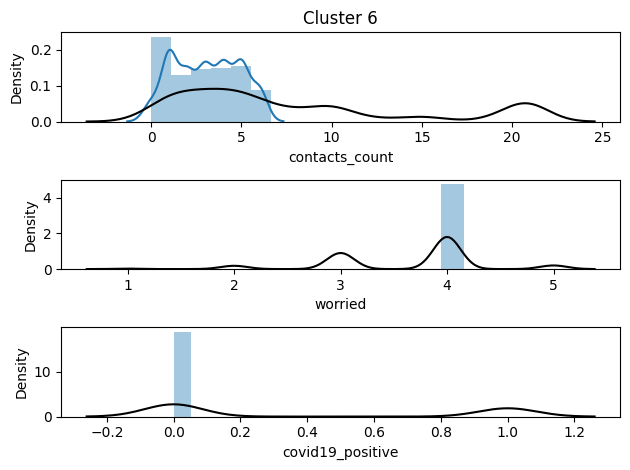

Distribution for cluster 7


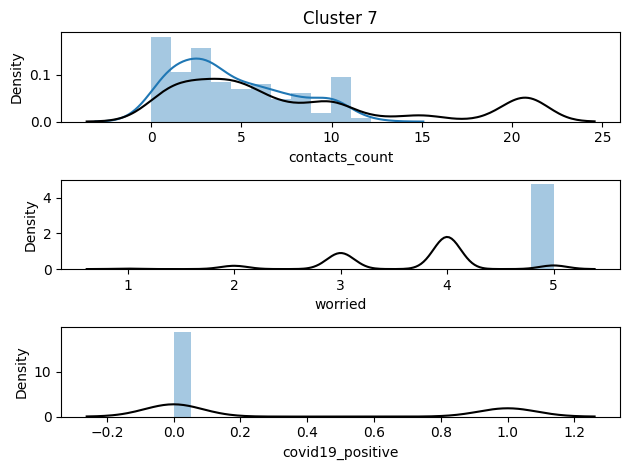

Distribution for cluster 8


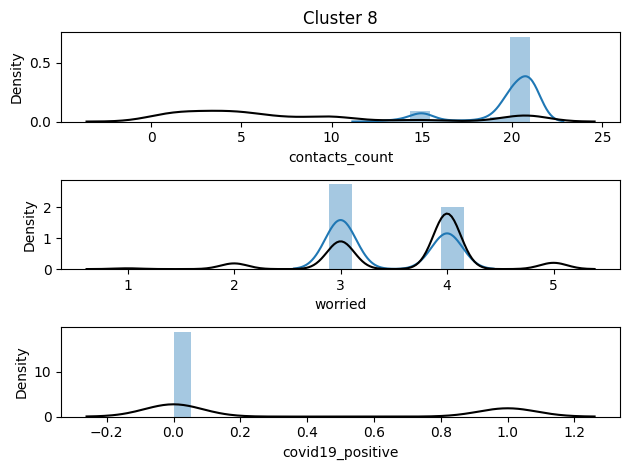

Distribution for cluster 9


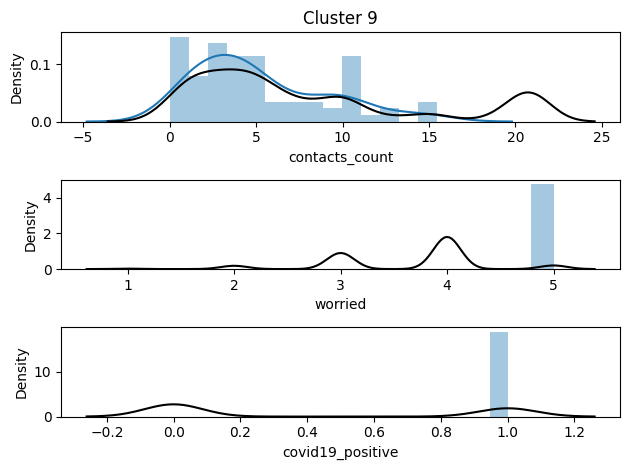

In [183]:
import numpy as np
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['contacts_count', 'worried', 'covid19_positive']
n_bins = 20

# inspecting clusters (just print them all now, but we should select them from the histogram plots)
clusters_to_inspect = [0, 1,2,3,4,5,6,7,8,9]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3) # number of vars
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols): 
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

## 1-4
age

In [218]:
df2 = df[['age', 'contacts_count', 'worried', 'covid19_positive']]

# Define mapping between age ranges and numerical values
age_mapping = {
    '0_10': 1,
    '10_20': 2,
    '20_30': 3,
    '30_40': 4,
    '40_50': 5,
    '50_60': 6,
    '60_70': 7,
    '70_80': 8,
    '100_110': 9
}
# Apply mapping to age data
df2['age_numeric'] = df2['age'].map(age_mapping)
df2.drop(columns=['age'], inplace=True)


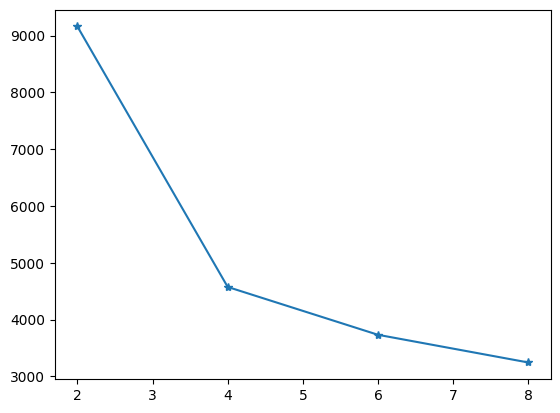

In [219]:
X = scaling(df2)

from kmodes.kprototypes import KPrototypes

clusters = []
cost_vals = []
# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[1,3]) # the index of the data that is categorical
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [220]:
for index, value in enumerate(clusters):
    print(str(index)+ ": "+ str(value))

0: KPrototypes(gamma=0.5, n_clusters=2, n_jobs=10, random_state=30678)
1: KPrototypes(gamma=0.5, n_clusters=4, n_jobs=10, random_state=30678)
2: KPrototypes(gamma=0.5, n_clusters=6, n_jobs=10, random_state=30678)
3: KPrototypes(gamma=0.5, n_jobs=10, random_state=30678)


In [221]:
print(df2.columns)

X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1], row[3]] for row in X] # variables of X with categorical datatype

Index(['contacts_count', 'worried', 'covid19_positive', 'age_numeric'], dtype='object')


In [222]:
model = clusters[1] # k = 4

In [223]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1,3]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1,3]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.7124660315259652
Silscore for categorical variables: -0.07036329142339624
The avg silhouette score for k=4: 0.3210513700512845


Cluster membership
Cluster_ID
1    2764
2    1678
3     690
0     657
Name: count, dtype: int64


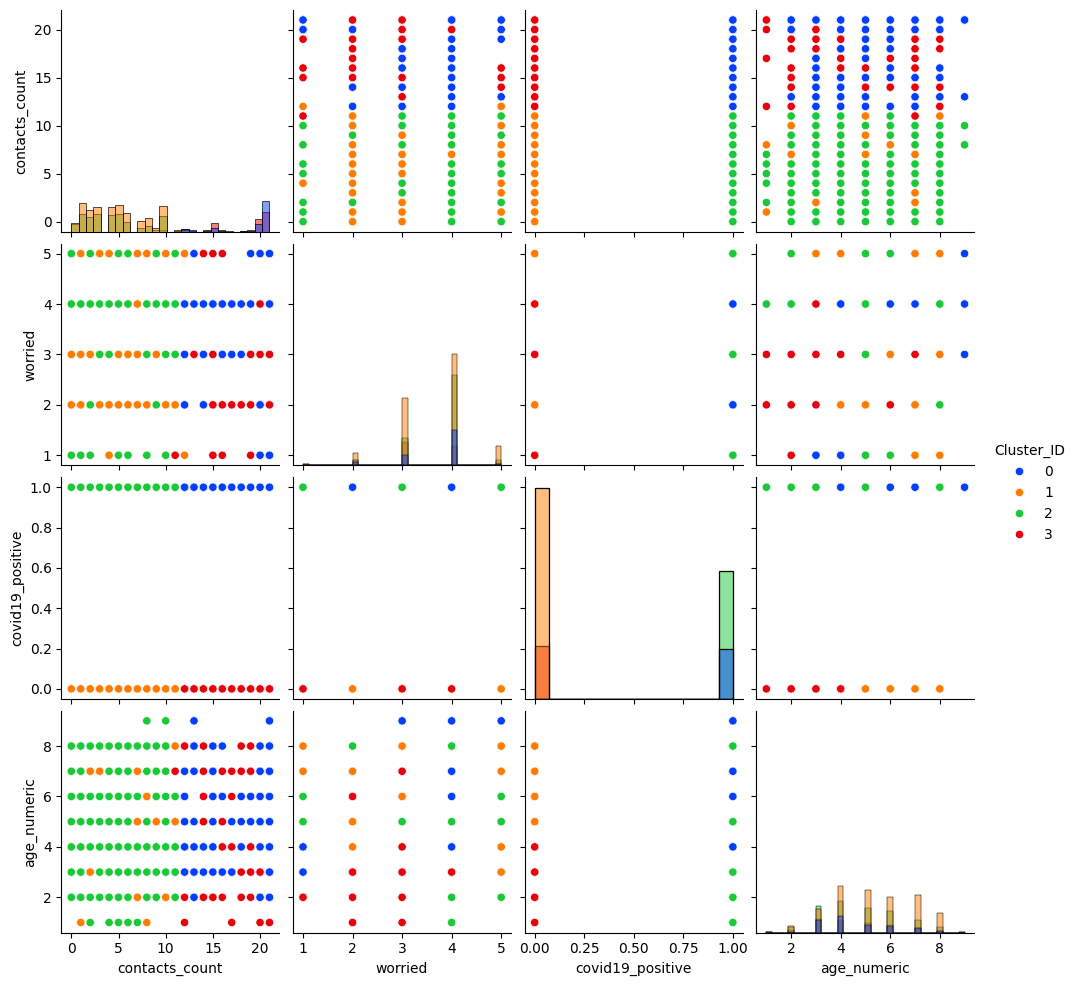

In [230]:
# again, ignore the warning

y = model.predict(X, categorical=[1,3])
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
custom_palette = sns.color_palette("bright", 4)
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist', palette=custom_palette)
plt.show()

Distribution for cluster 0


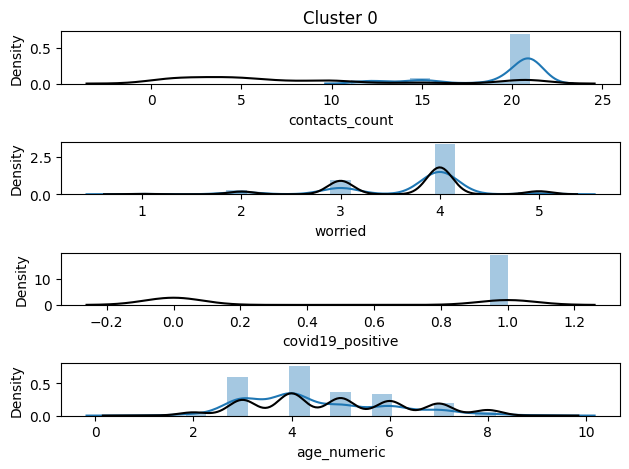

Distribution for cluster 1


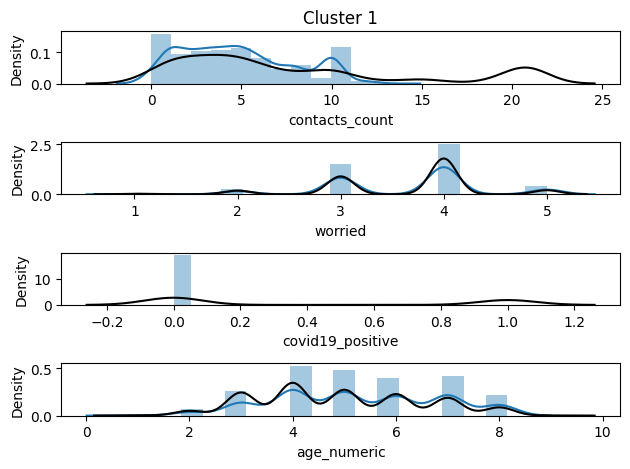

Distribution for cluster 2


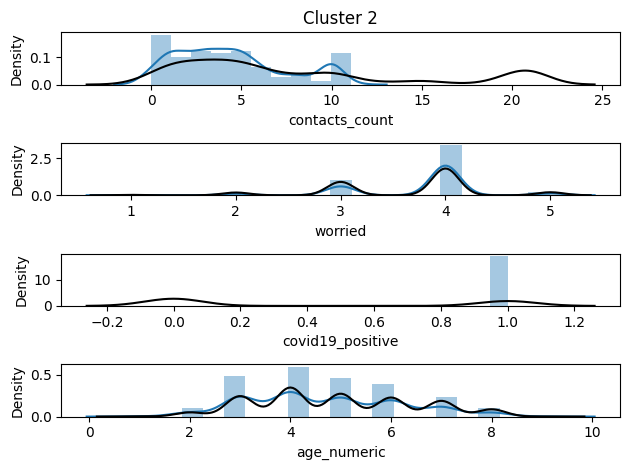

Distribution for cluster 3


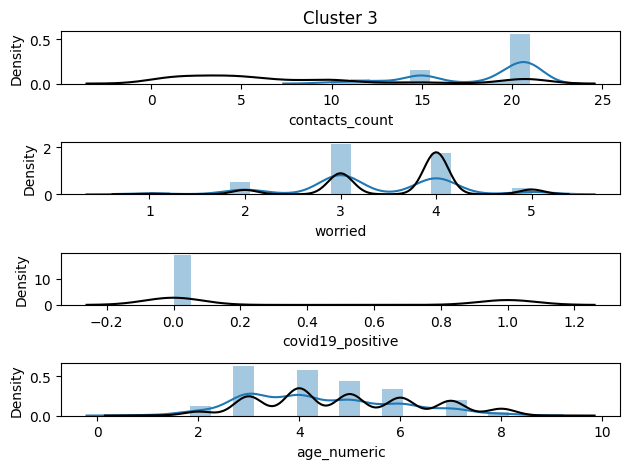

In [229]:
import numpy as np
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['contacts_count', 'worried', 'covid19_positive', 'age_numeric']
n_bins = 20

# inspecting clusters (just print them all now, but we should select them from the histogram plots)
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=4) # number of vars
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols): 
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()